# Important Read me:    this will only work as is on kaggle, else download all 50gigs of data. when using kaggle be sure to use the data given, can make notebook in competition or import it somehow.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# This Notebook is for CS4661, Final Project. Starting with the use of the Random Tree Algorithm and moving on to log_regression and other later on.
### Note: The above code block was generated by kaggle so I'll leave it and not touch it, only commented out the for loop. Everything else is from labs and other lecture notes unless said otherwise.

In [2]:
# importing these mainly from HW4 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

#We will use the actual training data as our main df and only use a smaller amount
#The reason is to prevent long wait times and this will allow us to keep things simpler
#And comparable to homework assignments.
df = pd.read_csv('/kaggle/input/amex-default-prediction/train_data.csv',nrows=8000)

#The reason we make a df for y is because the target is not in the training data so we
#need the labels from here
dfy = pd.read_csv('/kaggle/input/amex-default-prediction/train_labels.csv')

In [3]:
#What we will do now, is see all columns, to do this i followed this quick example
# https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf
pd.set_option('max_columns',None) #digit here is amount of cols to see, None to see all
pd.set_option('max_colwidth',None)
pd.set_option('min_rows',20)

#The reason we do this is to see more data, and makes it easier to
#explain certain things later so we added this all at the top here to keep things 
# a little more consistant

In [4]:
# we just look at the dataframe here to look how the data looks.
#df.head()
df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.00440

In [5]:
#and for y
dfy

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0
5,000084e5023181993c2e1b665ac88dbb1ce9ef621ec5370150fc2f8bdca6202c,0
6,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,0
7,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4cb59b50fec59e0b6381,0
8,0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85,1
9,00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6,1


In [6]:
# Moved to top, ignore this commented out stuff now

#What we will do now, is see all columns, to do this i followed this quick example
# https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf
#pd.set_option('max_columns',None) #digit here is amount of cols to see, None to see all
#pd.set_option('max_colwidth',None)
#pd.set_option('min_rows',20)

#Then we come back and look again to see them all.
#df.head(15)

In [7]:
#dfy.head() # quick look at labels again

# We now need to talk about what we see and what we may need to do about this data to make it more alike data used in class, something we are use to.
## What we see above by looking into some of the columns is that some are not needed (or can't be used) for what we are doing to use them for. Looking at columns with NaN along with the given categorical columns the kaggle page gives us. This means we are going to remove these from the dataset and create a new 'cleaner' data set that would be more suited to what we have learned in class.
#### This doesn't mean we can't come back to do new methods, but we will focus on those we know best for now. We can also come back later to use the original df and changing it to what we need to do most.

## We also see that a single customer has a lot of data as the ID shows, The first customer we see has 12 rows just for themselves. What we can do is find a way to use each customers most recent transaction, or data, and use that while removing all of their old ones. The reason for this is, if someone has defaulted the way their data is should be different than those who haven't. This also means a dfy of the same input size will have people not in the data

#### Note: We can use df and do OHE on it as well with the categorical data.

# Below is where we start applying/addressing what we said we would in the above wall of text

In [8]:
#So the first thing we need to do is see which columns we should drop.

#We will also temp change max_rows to None so we see every columns values of nulls
pd.set_option('max_rows',None) 
# important to see how much is missing so we don't use a weird column that
#we haven't dealt with, and we're assuming it's bad data and won't help
#or may confuse the algorithm


# Firstly we will drop the catagory columns and come back to them later to see if 
# they will help or not to improve accuracy
#df.isnull().sum() #This gives us a sum of all NaN in all columns 
# !!!!! Above line commented out, since it is a long print out, uncomment to see it


# Had to see how to sum up the nulls so had to use the above line, found example of use here:
# https://stackoverflow.com/questions/41681693/pandas-isnull-sum-with-column-headers

### What we see is that a good amount of this data is NaN and currently we do not want to use those, mainly when above a certain point.


In [9]:
# We want to remove these columns based on percentage basically.
# With a little googling of what we want to do, we find a quick tutorial
# https://thispointer.com/pandas-drop-dataframe-columns-based-on-nan-percentage/
# note we do it differently because their way of using more variables was overly complex

#Now the main question is what we should pick as a good percentage and why
# We'll briefly decide on 85%, mainly because if too much is missing, we believe there
# will not be much information to get out of said column

new_df = df.dropna(axis=1,thresh=int((1-0.85)*len(df)))
new_df.shape 

#We see columns drop from 190 to 168 

(8000, 168)

In [10]:
#Lets see the data again here
#new_df.isnull().sum()
# !!!!! Above line commented out, since it is a long print out, uncomment to see it

In [11]:
pd.set_option('max_rows',60) # Setting back to default

In [12]:
# Now that we have a new data frame with less columns we need to address the fact that
# each customer has multiple data points(rows) in df
# We need to find a way to do this based on most recent date, S_2, as mentioned earlier.
# Most recent date would mean we won't have old data where a customer wasn't in default yet.

# Doing this will then mean we will have a data frame similar to what we do in the 
# homework assignments, making it easier to deal with.

# Found this, narrows down what we need
# https://www.folkstalk.com/tech/how-to-delete-records-in-pandas-before-a-certain-date-with-code-examples/

# https://www.geeksforgeeks.org/python-pandas-dataframe-set_index/
# https://stackoverflow.com/questions/41589365/filling-missing-values-using-forward-and-backward-fill-in-pandas-dataframe-ffil
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html
main_df = new_df 
main_df = main_df.set_index(['customer_ID']) #instead of having a number index in the df it makes it the ID
main_df = main_df.ffill().bfill() # fills in data with data close to it, basically makes it so there are no NaN values to break things
main_df = main_df.reset_index() #Makes the ID a column again so we can group the data again

# We then group by customer ID, and we use tail. Using tail with 1 will only return the last data point(most recent)
# from that customer, meaning we won't have more than one data point for each person.
# This line is key in making the data like the ones we normally work with
main_df = main_df.groupby('customer_ID').tail(1) 

main_df = main_df.set_index(['customer_ID'])# We then make the index the IDs again
#We can finally drop the S_2 column which is now not needed and was causing issues
main_df.drop(['S_2'], axis=1, inplace=True)
main_df.shape 

(662, 166)

In [13]:
# For use in screenshots only 
#main_df = new_df 
#main_df = main_df.set_index(['customer_ID']) 
#main_df = main_df.ffill().bfill() 
#main_df = main_df.reset_index()
#main_df = main_df.groupby('customer_ID').tail(1) 
#main_df = main_df.set_index(['customer_ID'])
#main_df.drop(['S_2'], axis=1, inplace=True)

In [14]:
# If we then use these lines again we can see there is no more null or missing values as well
# commented out because it takes so much space while working
pd.set_option('max_rows',None) 
#main_df.isnull().sum()

In [15]:
pd.set_option('max_rows',60) 

# So now everything above this line, is basically a dataframe we can use and work with that looks the same as the ones we have used in the past. This makes it easier to work on the problem now, as well as we can copy and paste it to create a new notebook which will use a different algorithm!

## Below begins the Random forest algo
#### As we mentioned earlier we won't use OHE, and will drop the given categorical frames.

In [16]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
# Dropping the categorical columns here to not deal with them. 
main_df = main_df.drop(['D_63','D_64'], axis = 1)

main_df.head() # we can check that they are gone now

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.934745,0.009119,0.009382,1.007647,0.006104,0.135021,0.001604,0.007174,0.525600,0.003258,0.070793,0.740102,0.231717,0.008309,0.420521,0.539715,0.192376,0.149564,0.058425,0.002927,0.153461,0.673522,0.009535,0.000085,0.203524,0.629392,0.326101,0.006409,0.034643,0.010260,0.001770,1.008097,0.008517,0.105671,0.112294,0.488232,0.187285,0.166636,0.100107,0.009444,0.007174,0.007397,0.010239,0.063465,0.258461,0.227637,0.014553,0.402246,0.446568,0.008656,0.006408,0.009414,1.007897,0.005274,0.007630,6.0,0.184036,0.003945,0.686719,0.005375,0.005469,0.008050,0.008254,0.377991,0.006970,0.304625,0.040367,0.006564,0.001298,0.001352,0.002230,0.009162,0.421334,0.006475,0.001068,0.000747,0.002193,0.006345,0.000026,0.208253,0.001057,0.009351,0.007236,0.009177,0.507423,0.006550,1.002178,0.084745,0.006099,0.000013,0.002902,0.001115,0.001911,0.003256,0.0,0.001277,0.009968,0.002330,0.002517,1,0.003511,0.008099,0.007645,0.009411,0.006355,0.008501,1.007528,0.004638,0.001445,0.003080,1.006011,0.003641,0.004638,0.003866,0.005909,0.005458,0.001190,0.917811,0.131801,0.936067,0.971994,0.001281,0.943340,1.002457,1.014510,1.073985,0.671683,0.007441,0.008676,1.006130,2.0,0.000226,1.009372,0.100454,0.928955,0.003658,1.0,0.255787,0.0,4.0,0.260255,0.256656,0.0,0.719791,0.433844,0.003580,0.684978,0.008398,1.0,1.008338,0.999737,1.008523,0.003973,0.004186,0.005702,0.006210,0.002715,0.007186,0.004234,0.005086,0.141214,0.005810,0.002970,0.008533
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.880519,0.178126,0.034684,1.004028,0.006911,0.165509,0.005552,0.005068,0.060646,0.008781,0.020626,0.266275,0.027000,0.004976,0.438828,0.402195,0.014696,0.167634,0.028411,0.000974,0.153461,0.339683,0.012926,0.102036,0.242366,0.570898,0.297130,0.006409,0.043929,0.014570,0.002911,1.002821,0.003283,0.208516,0.019050,0.406434,0.036112,0.748383,0.017684,0.005880,0.009756,0.127805,0.018667,0.212538,0.411989,0.048978,0.009538,0.363754,0.233980,0.008747,0.002940,0.009414,1.003602,0.008047,0.004319,6.0,0.192371,0.007744,0.287101,0.006190,0.007636,0.006174,0.000883,0.007636,0.001278,0.304711,0.014705,0.004659,0.007925,0.009600,0.002383,0.008256,0.227755,0.021153,0.000182,0.001542,0.009117,0.006892,0.006931,0.002119,0.002046,0.009664,0.005375,0.005009,0.507423,0.005414,1.008568,0.019672,0.006197,0.005370,0.006271,0.009911,0.000983,0.006669,0.0,0.009298,0.006460,0.006503,0.007052,1,0.005091,0.001838,0.008645,0.009467,0.003500,0.000473,1.000766,0.004864,0.000907,0.003830,0.009166,0.004641,0.000195,0.000523,0.006421,0.004975,0.002397,0.920889,0.132865,0.930629,0.977674,0.003213,0.001621,0.008952,0.004363,1.073985,0.007774,0.007457,0.032899,1.007599,2.0,0.004743,1.006547,0.019811,0.292214,0.009312,1.0,0.454329,0.0,-1.0,0.446036,0.436884,0.0,0.551341,0.286821,0.008603,0.136650,0.009314,1.0,0.000229,0.999252,0.001777,0.002943,0.002202,0.001928,0.002996,0.001701,0.002980,0.007479,0.007870,0.141214,0.003284,0.003169,0.008514
00001b

## Based on the week 15 lecture we will now try and do PCA since the amount of columns is completely overwhelming. 
#### We do it here since if we do it earlier we felt as though the data was not 'clean' or similar enough to our previous labs and homework assignments, plus it had a date column as well which we do not want it to use.

In [17]:
X = main_df
y = dfy['target']

In [18]:
# We get an error below if we use above as is. What we will do is make both X and y the same length.
# What we will do is cut down the size of y to what X is, the reason is dfy is "small" and we use all of the given label data.
# We'll get the length of X and use it to recreate the dfy and y here.
main_df_length = len(main_df)
dfy = pd.read_csv('/kaggle/input/amex-default-prediction/train_labels.csv',nrows=main_df_length)
y = dfy['target']

In [19]:
# Used from a group members hw5 here for comments/explaination

# Randomly splitting the original dataset into training set and testing set
# The function "train_test_split" from "sklearn.model_selection" library performs random splitting.
# "test_size=0.10" means that pick 10% of data samples for testing set, and the rest (90%) for training set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [20]:
# Straight from the lecture 15 powerpoint 1 slides. CS4661-Lec21.pdf

from sklearn.decomposition import PCA
n = 20 # We start high since there is a lot of different types of data here, ended up at 20 since it was giving good predictions

my_pca = PCA(n_components = n,random_state=2)
# I knew something was wrong, this had a random state and had to make it 2(or any num) so it remains the same in the future.

X_Train_new = my_pca.fit_transform(X_train)
X_Test_new = my_pca.fit_transform(X_test)

In [ ]:

from sklearn.decomposition import PCA
n = 20 
my_pca = PCA(n_components = n,random_state=2)

X_Train_new = my_pca.fit_transform(X_train)
X_Test_new = my_pca.fit_transform(X_test)

#### We now use the above new Training and Testing variables instead of the originals 

In [21]:

my_RandomForest = RandomForestClassifier(n_estimators = 31, bootstrap = True, random_state=2)

In [22]:
my_RandomForest.fit(X_Train_new, y_train)

RandomForestClassifier(n_estimators=31, random_state=2)

In [23]:
predict_my_RandomForest = my_RandomForest.predict(X_Test_new)

In [24]:
#accuracy score 

score_my_RandomForest = accuracy_score(y_test, predict_my_RandomForest)

print('Random Forest: ',score_my_RandomForest)

Random Forest:  0.7611940298507462


# Random Forest AUC and ROC Curve
#### Used hw4 q2 as reference

In [25]:
# Just like the homework 4 we use predict_proba to start getting the AUC and ROC curve stuff.
predict_proba_my_RandomForest = my_RandomForest.predict_proba(X_Test_new)
#print(predict_proba_my_RandomForest)
#print(predict_proba_my_RandomForest[:,1]) # just how they do it in lab 5 

In [26]:
# Pos label is 1 as 1 means the person has defaulted, unlike hw4 where its a string 'Yes'
fpr_RF, tpr_RF, thresholds_RF = metrics.roc_curve(y_test, predict_proba_my_RandomForest[:,1], pos_label=1)

#print(fpr)
#print(tpr)

In [27]:
# AUC:
AUC_RF = metrics.auc(fpr_RF, tpr_RF)
print('The AUC for Random Forest is: ',AUC_RF) # in the graph it gets rounded 

The AUC for Random Forest is:  0.8216403162055336


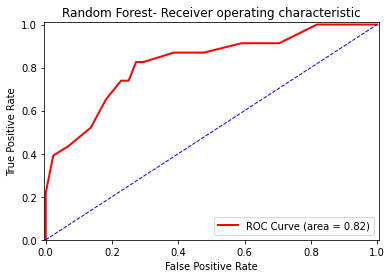

In [28]:
# This part is straight from the homework 4 q2 assignment as it works fine here for what we need it for.


# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_RF, tpr_RF, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_RF)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest- Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Start of Logistic Regression below!

In [29]:

from sklearn.linear_model import LogisticRegression

In [30]:

log_reg = LogisticRegression()

In [31]:
# Training
log_reg.fit(X_Train_new, y_train)

LogisticRegression()

In [32]:
# just doing a prediction like in HW 4 Q2
y_predict_log_reg = log_reg.predict(X_Test_new)

In [33]:
# finding the acc score 
score_log_reg = accuracy_score(y_test, y_predict_log_reg)
print('log reg accuracy:', score_log_reg)

log reg accuracy: 0.746268656716418


## AUC and ROC for Log Regression 

In [34]:
predict_proba_log_reg = log_reg.predict_proba(X_Test_new)

In [35]:
fpr_LR, tpr_LR, thresholds_LR = metrics.roc_curve(y_test, predict_proba_log_reg[:,1], pos_label=1)

In [36]:
# AUC:
AUC_LR = metrics.auc(fpr_LR, tpr_LR)
print('The AUC for Log Regression is: ',AUC_LR) # in the graph it gets rounded 

The AUC for Log Regression is:  0.6936758893280632


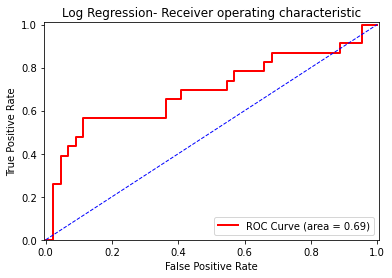

In [37]:
# This part is straight from the homework 4 q2 assignment as it works fine here for what we need it for.


# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_LR, tpr_LR, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_LR)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log Regression- Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# As a third algorithm we use a Decision Tree


In [38]:
# importing the tree classifier here since we didn't at the start.
from sklearn.tree import DecisionTreeClassifier

In [39]:
dec_tree = DecisionTreeClassifier(random_state=64)

In [40]:
# we do a little fitting / training
dec_tree.fit(X_Train_new, y_train)

DecisionTreeClassifier(random_state=64)

In [41]:
# we then test it and get it's predictions 
y_predict_dec_tree = dec_tree.predict(X_Test_new)


In [42]:
#accuracy score 

score_dec_tree = accuracy_score(y_test, y_predict_dec_tree)

print('dec tree: ',score_dec_tree)
#We see we only get about a 59% accuracy

dec tree:  0.5970149253731343


## AUC and ROC for Dec Tree

In [43]:
predict_proba_dec_tree = dec_tree.predict_proba(X_Test_new)
fpr_dec_tree, tpr_dec_tree, thresholds_dec_tree = metrics.roc_curve(y_test, predict_proba_dec_tree[:,1], pos_label=1)

In [44]:
# AUC:
AUC_dec_tree = metrics.auc(fpr_dec_tree, tpr_dec_tree)
print('The AUC for Dec Tree is: ',AUC_dec_tree) # in the graph it gets rounded 

The AUC for Dec Tree is:  0.558300395256917


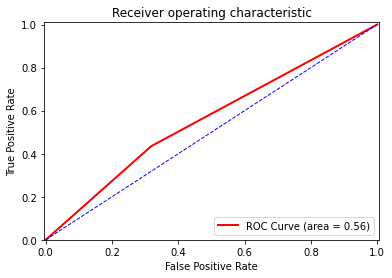

In [45]:
# This part is straight from the homework 4 q2 assignment as it works fine here for what we need it for.


# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_dec_tree, tpr_dec_tree, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_dec_tree)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Forth we use KNN

In [46]:
# Finally we import KNN
from sklearn.neighbors import KNeighborsClassifier

# We create a KNN object here with k = 3 
k = 21
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_Train_new, y_train)

KNeighborsClassifier(n_neighbors=21)

In [47]:
#accuracy score
y_predict_knn = knn.predict(X_Test_new)
score_knn = accuracy_score(y_test, y_predict_knn)
print('Accuracy for KNN: ',score_knn)

Accuracy for KNN:  0.6865671641791045


## We now move on to ROC and AUC of KNN

In [48]:
# AUC stuff:
predict_proba_knn = knn.predict_proba(X_Test_new)
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test, predict_proba_knn[:,1], pos_label=1)

AUC_knn = metrics.auc(fpr_knn, tpr_knn)
print('The AUC for KNN is: ',AUC_knn) # in the graph it gets rounded 

The AUC for KNN is:  0.6002964426877471


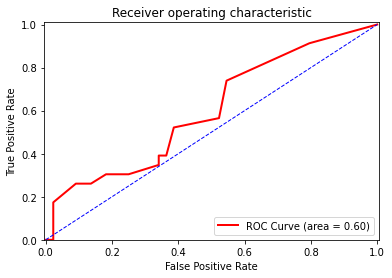

In [49]:
# This part is straight from the homework 4 q2 assignment as it works fine here for what we need it for.


# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_knn)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# This area is for more graphs!!!!!

##### *Thank god I took stats*

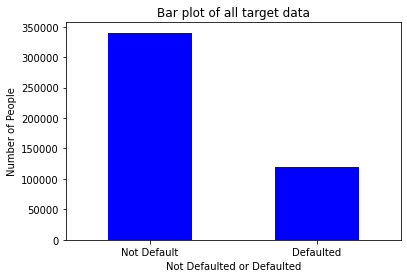

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

dfy_full = pd.read_csv('/kaggle/input/amex-default-prediction/train_labels.csv')

plt.figure()
dfy_full['target'].value_counts().plot(kind = 'bar', color = 'blue', title = 'Bar plot of all target data')
plt.xlabel('Not Defaulted or Defaulted')
plt.ylabel('Number of People')
plt.xticks((0,1),('Not Default','Defaulted'),rotation='horizontal')
plt.show()

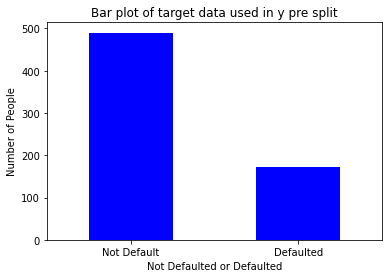

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
y.value_counts().plot(kind = 'bar', color = 'blue', title = 'Bar plot of target data used in y pre split')
plt.xlabel('Not Defaulted or Defaulted')
plt.ylabel('Number of People')
plt.xticks((0,1),('Not Default','Defaulted'),rotation='horizontal')
plt.show()

In [52]:
# counts for above two used
print(dfy_full['target'].value_counts())
print(dfy_full['target'].value_counts(normalize = True))
print(y.value_counts())
print(y.value_counts(normalize = True))

0    340085
1    118828
Name: target, dtype: int64
0    0.741066
1    0.258934
Name: target, dtype: float64
0    490
1    172
Name: target, dtype: int64
0    0.740181
1    0.259819
Name: target, dtype: float64


#### Graph of Accuracies from above, then of highest AUC and ROC values

In [53]:
X_axis = ['KNN','Dec Tree','Log Regression','Random Forest']
accScoresCombined = [score_knn,score_dec_tree,score_log_reg,score_my_RandomForest]
AUCCombined =[AUC_knn,AUC_dec_tree, AUC_LR,AUC_RF]
pieLabels = ["KNN","Dec Tree","Log Reg","Rand Forest"]

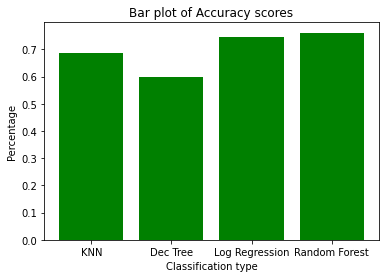

In [54]:
# https://www.machinelearningplus.com/plots/bar-plot-in-python/
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.bar(X_axis, accScoresCombined , color = 'green')
plt.title('Bar plot of Accuracy scores')
plt.xlabel('Classification type')
plt.ylabel('Percentage')
#plt.xticks((0,1),('Not Default','Defaulted'),rotation='horizontal')
plt.show()

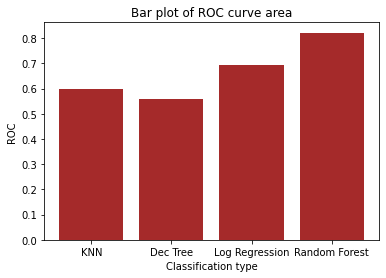

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.bar(X_axis, AUCCombined , color = 'brown')
plt.title('Bar plot of ROC curve area')
plt.xlabel('Classification type')
plt.ylabel('ROC')
#plt.xticks((0,1),('Not Default','Defaulted'),rotation='horizontal')
plt.show()

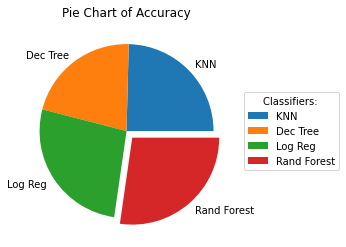

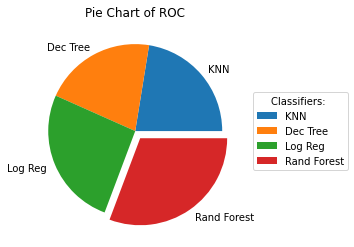

In [56]:
plt.figure()
accExplode = [0,0,0,0.1]
plt.pie(accScoresCombined, labels = pieLabels, explode = accExplode)
plt.legend(title = "Classifiers: ",loc = "center right",bbox_to_anchor = (1, 0, 0.5, 1))
plt.title("Pie Chart of Accuracy")
plt.show()

plt.figure()
ROCExplode = [0,0,0,0.1]
plt.pie(AUCCombined, labels = pieLabels, explode = ROCExplode)
plt.legend(title = "Classifiers: ",loc = "center right",bbox_to_anchor = (1, 0, 0.5, 1))
plt.title("Pie Chart of ROC")
plt.show()

# TODO: AUC AND ROC numbers   DONE